# Image Elements Detection

# Libraries

In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import math
import numpy as np
from math import pi
from scipy import ndimage
from statistics import mean
from matplotlib import pyplot as plt

# Exercise 1

## *i) Find the main edges of image11.jpg* 

First step is to transform the original image to grayscale.
Secondly, image gets processed by a low-pass filter in order to smoothen up unnecessary details like the blue flower that maybe be misintepreted like edges.
Filtered image is then ready to be fed to Canny() function.

Canny's first argument is the input image. The second and third are two threshold values, minVal and maxVal. This stage decides which are all edges are really edges and which are not. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded.

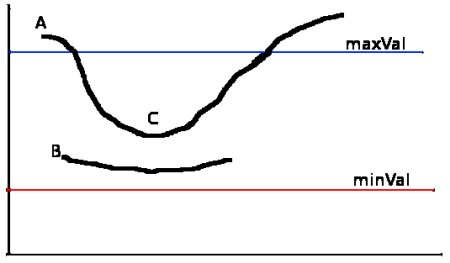



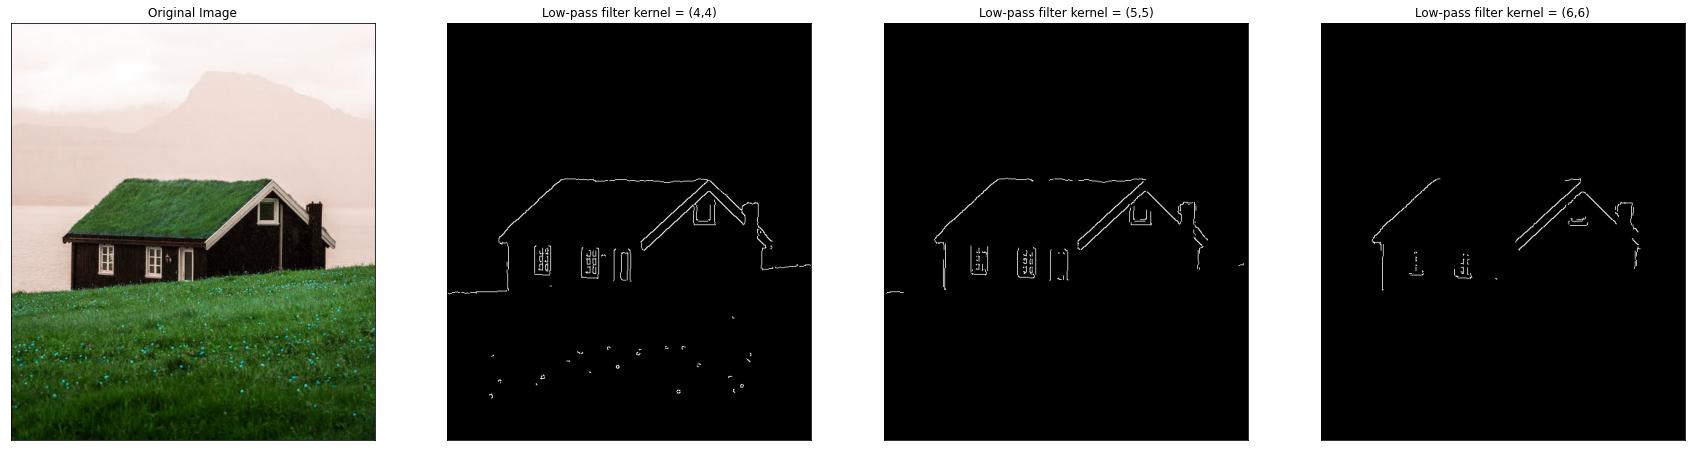

In [2]:
original = cv2.imread('./image11.jpg')

fig, axes = plt.subplots(1, 4, figsize=(30,25))
plt.subplot(141),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

img = cv2.blur(original,(4,4))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,250)

plt.subplot(142),plt.imshow(edges, cmap = 'gray')
plt.title('Low-pass filter kernel = (4,4)'), plt.xticks([]), plt.yticks([])

img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,250)

plt.subplot(143),plt.imshow(edges, cmap = 'gray')
plt.title('Low-pass filter kernel = (5,5)'), plt.xticks([]), plt.yticks([])

img = cv2.blur(original,(6,6))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,250)

plt.subplot(144),plt.imshow(edges, cmap = 'gray')
plt.title('Low-pass filter kernel = (6,6)'), plt.xticks([]), plt.yticks([])

plt.show()

Observing the different kernels for the low-pass filter, when using (4,4) or less, flower details are seen as edges, while using (6,6) and above the house is losing its basic structure lines. The appropriate kernel seems to be (5,5) in order to proceed to Canny.

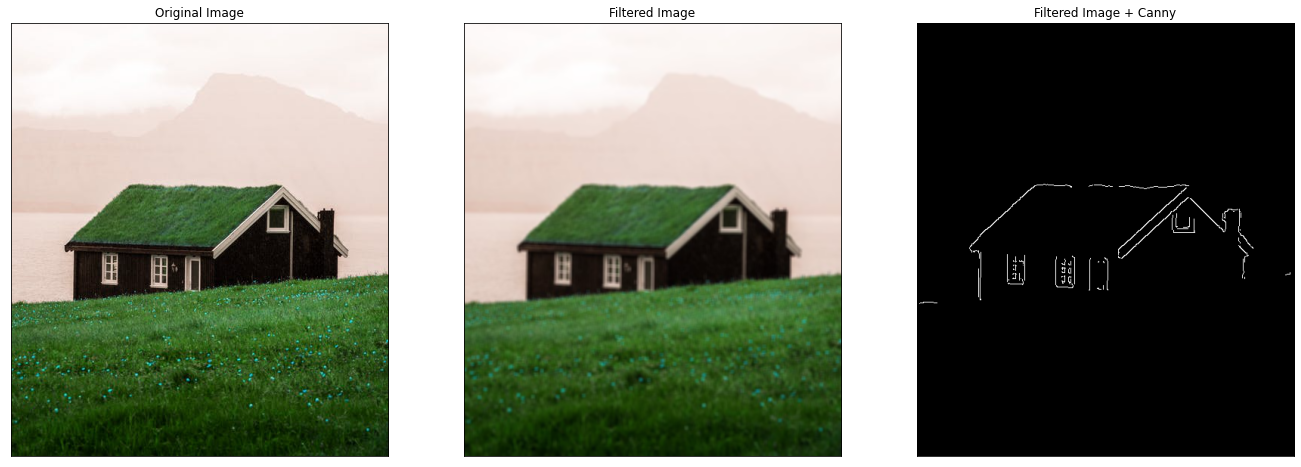

In [3]:
original = cv2.imread('./image11.jpg')

fig, axes = plt.subplots(1, 3, figsize=(23,18))
plt.subplot(131),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

img = cv2.blur(original,(5,5))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,250)

plt.subplot(132),plt.imshow(img, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(edges, cmap = 'gray')
plt.title('Filtered Image + Canny'), plt.xticks([]), plt.yticks([])



plt.show()

For Canny, multiple values of minVal and maxVal are tested to observe reflection to the edge detection. Below are the results of this testing.

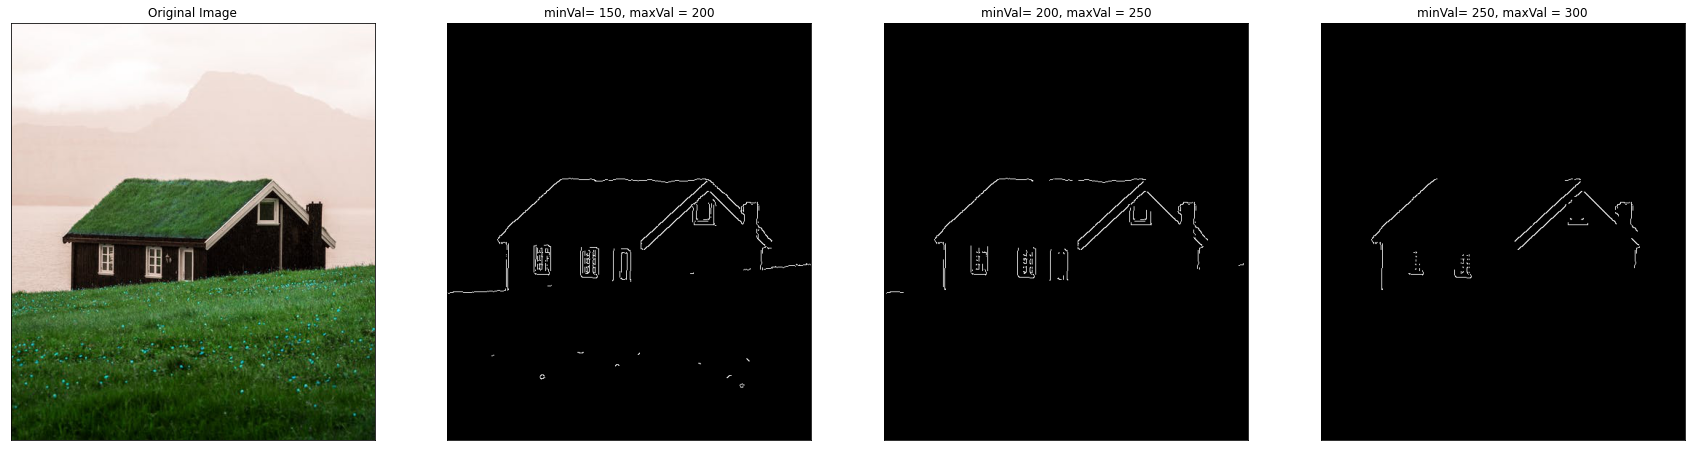

In [4]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

fig, axes = plt.subplots(1, 4, figsize=(30,25))
plt.subplot(141),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,200)

plt.subplot(142),plt.imshow(edges, cmap = 'gray')
plt.title('minVal= 150, maxVal = 200'), plt.xticks([]), plt.yticks([])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,250)

plt.subplot(143),plt.imshow(edges, cmap = 'gray')
plt.title('minVal= 200, maxVal = 250'), plt.xticks([]), plt.yticks([])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,250,300)

plt.subplot(144),plt.imshow(edges, cmap = 'gray')
plt.title('minVal= 250, maxVal = 300'), plt.xticks([]), plt.yticks([])

plt.show()

The appropriate range seems to be minVal=200, maxVal=250, so filter and Canny parameters are finely tuned for detecting the main edges of the original image.

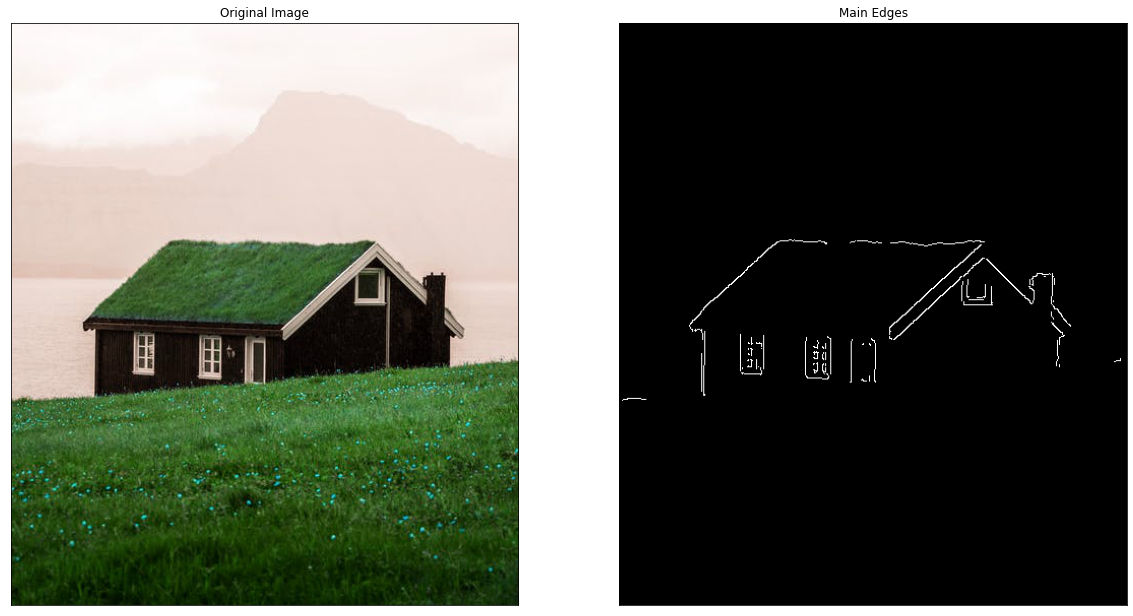

In [5]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

fig, axes = plt.subplots(1, 2, figsize=(20,15))
plt.subplot(121),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,250)

plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Main Edges'), plt.xticks([]), plt.yticks([])

plt.show()

## *ii) Estimate the angle (with respect to the horizontal axis) of the diagonal edges of the  roof* 

The goal of this task is to calculate angle ω of the roof.

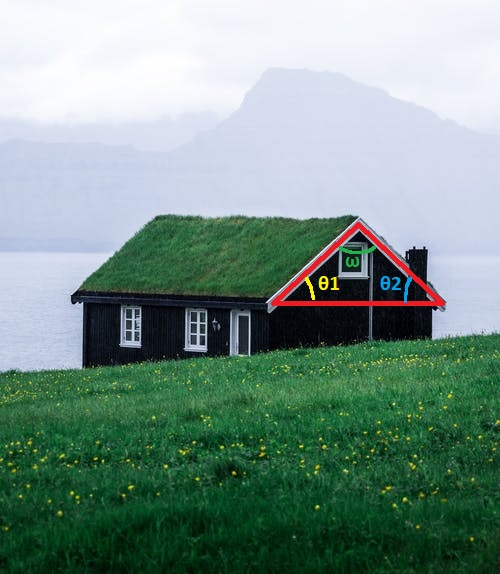


For reaching this goal, two lines must be found that each one of them lies on the half part of the roof. When these are finally found, the angle of each one needs to be measured so that the property of angles of triangles can be used:

***ω = 180 - θ1 - θ2***

Θ1 and θ2 are computed based on the coordinates of the start and the end points of the lines.

The two parameters to identify the target roof lines are:
- ***minLineLength***: Minimum line length. Line segments shorter than that are rejected
- ***maxLineGap***: Maximum allowed gap between points on the same line to link them


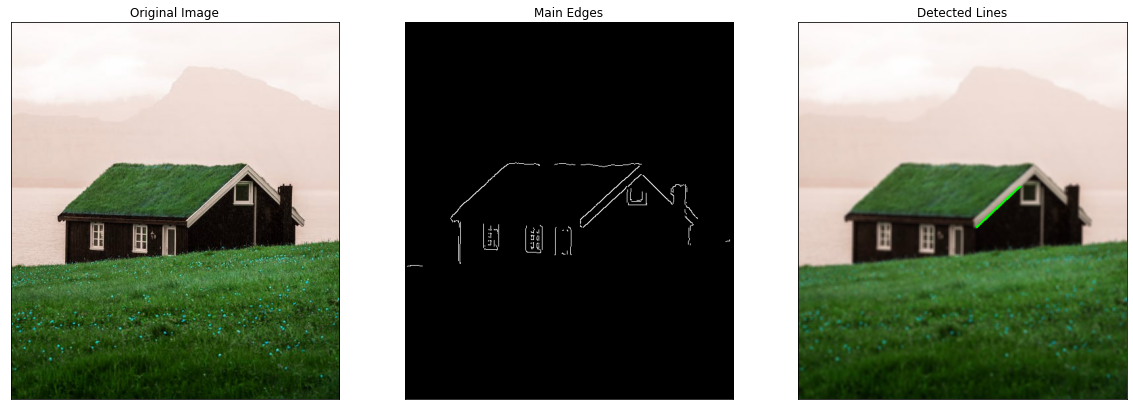

IndexError: list index out of range

In [7]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,250) 

fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(131),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(edges, cmap = 'gray')
plt.title('Main Edges'), plt.xticks([]), plt.yticks([])

minLineLength = 100    
maxLineGap = 45
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
angles =[]
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        angles.append(math.atan((y2-y1)/(x2-x1)))

plt.subplot(133),plt.imshow(img)
plt.title('Detected Lines'), plt.xticks([]), plt.yticks([])

plt.show()

print(f"\nθ1 = {round(abs(math.degrees(angles[0])))}°, θ2 = {round(abs(math.degrees(angles[1])))}°\n")
print(f"\nThe angle of the roof(ω) is: {round(180 - abs(math.degrees(angles[0]))- abs(math.degrees(angles[1])))}°\n") #ω = 180 -θ1 -θ2

*Line Detection without low-pass filtering*

An additional experiment was to try raw Edge-Line detection without filtering the original image first. The result is almost identical compared to the previous example, but one can clearly see that the edge detection step produces far more unecessary edges.  Of course, in other cases that include mutliple lines or connected edges this might not work, so the image preprocessing step is significant in general terms.

In [ ]:
img = cv2.imread('./image11.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,180,apertureSize = 3) 

fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(edges, cmap = 'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])

minLineLength = 100    
maxLineGap = 45
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
angles =[]
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        angles.append(math.atan((y2-y1)/(x2-x1)))

plt.subplot(133),plt.imshow(img)
plt.title('Detected Lines'), plt.xticks([]), plt.yticks([])

plt.show()

print(f"\nθ1 = {round(abs(math.degrees(angles[0])))}°, θ2 = {round(abs(math.degrees(angles[1])))}°\n")
print(f"\nThe angle of the roof is: {round(180 - abs(math.degrees(angles[0]))- abs(math.degrees(angles[1])))}°\n")

## *iii) Find the corners of the image11.jpg*

OpenCV has the function cv.cornerHarris() for corner detection. Its arguments are:

*   img - Input image. It should be grayscale and float32 type.
*   blockSize - It is the size of neighbourhood considered for corner detection
*   ksize - Aperture parameter of the Sobel derivative used.
*   k - Harris detector free parameter in the equation.

Tweaking these parameters, don't cause significat changes to the corner detection so the openCV example's parameters will be used.

Thresholding for a suitable score gives the corners in the image. That is the part where the parameter testing must take place.

In [ ]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst, None)

fig, axes = plt.subplots(1, 4, figsize=(30,25))
plt.subplot(141),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])


# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.2*dst.max()]=[255,0,0]

plt.subplot(142),plt.imshow(img)
plt.title('Threshold = 0.2'), plt.xticks([]), plt.yticks([])



# Threshold for an optimal value, it may vary depending on the image.
img = cv2.blur(original,(5,5))
img[dst>0.01*dst.max()]=[255,0,0]

plt.subplot(143),plt.imshow(img)
plt.title('Threshold = 0.01'), plt.xticks([]), plt.yticks([])



# Threshold for an optimal value, it may vary depending on the image.
img = cv2.blur(original,(5,5))
img[dst>0.3*dst.max()]=[255,0,0]

plt.subplot(144),plt.imshow(img)
plt.title('Threshold = 0.3'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst, None) #result is dilated for marking the corners

fig, axes = plt.subplots(1, 3, figsize=(15,9))

plt.subplot(121),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.2*dst.max()]=[255,0,0]

plt.subplot(122),plt.imshow(img)
plt.title('Detected Corners'), plt.xticks([]), plt.yticks([])

plt.show()

## *iv) Based on the detected corners, locate the windows*

J. Shi and C. Tomasi made a small modification to Harris Corner Detector in their paper Good Features to Track which shows better results compared to it. The scoring function in Harris Corner Detector was given by:

*R=λ1λ2−k(λ1+λ2)^2* 

Instead of this, Shi-Tomasi proposed:

*R=min(λ1,λ2)*

If it is a greater than a threshold value, it is considered as a corner. If we plot it in λ1−λ2 space as we did in Harris Corner Detector, we get an image as below:

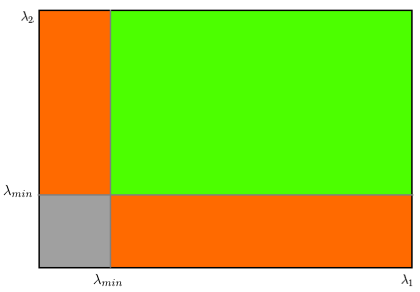


From the figure, you can see that only when λ1 and λ2 are above a minimum value, λmin, it is considered as a corner(green region).

OpenCV has a function, cv.goodFeaturesToTrack(). It finds N strongest corners in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it). As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.  
  
With all this information, the function finds corners in the image. All corners below quality level are rejected. Then it sorts the remaining corners based on quality in the descending order. Then function takes first strongest corner, throws away all the nearby corners in the range of minimum distance and returns N strongest corners.

After, tweaking the parameters of the Tomasi algorithms, you can see the ideal achieved result.

In [ ]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

fig, axes = plt.subplots(1, 2, figsize=(15,9))
plt.subplot(121),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 1
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner

plt.subplot(122),plt.imshow(img)
plt.title('Windows Locations'), plt.xticks([]), plt.yticks([])
plt.show()

Now, let's see the impact of the most significant parameters:

***Quality Level*** : Parameter characterizing the minimal accepted quality of image corners

In [ ]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

fig, axes = plt.subplots(1, 4, figsize=(30,25))
plt.subplot(141),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.1
minDistance = 1
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(142),plt.imshow(img)
plt.title('qualityLevel = 0.1'), plt.xticks([]), plt.yticks([])

original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 1
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(143),plt.imshow(img)
plt.title('qualityLevel = 0.48'), plt.xticks([]), plt.yticks([])

original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.7
minDistance = 1
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(144),plt.imshow(img)
plt.title('qualityLevel = 0.7'), plt.xticks([]), plt.yticks([])

plt.show()

When qualityLevel is ~0.5, Tomasi algorithm locates the windows pretty accurately.

***blockSize*** : Size of an average block for computing a derivative covariation matrix over each pixel neighborhood.

In [ ]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

fig, axes = plt.subplots(1, 4, figsize=(30,25))
plt.subplot(141),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 1
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(142),plt.imshow(img)
plt.title('blockSize = 2'), plt.xticks([]), plt.yticks([])

original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 1
blockSize = 5
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(143),plt.imshow(img)
plt.title('blockSize = 5'), plt.xticks([]), plt.yticks([])

original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 1
blockSize = 15
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(144),plt.imshow(img)
plt.title('blockSize = 15'), plt.xticks([]), plt.yticks([])

plt.show() 

2 is the key value of the parameter blockSize.

***minDistance*** : Minimum possible Euclidean distance between the returned corners

In [ ]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

fig, axes = plt.subplots(1, 4, figsize=(30,25))
plt.subplot(141),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 1
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(142),plt.imshow(img)
plt.title('minDistance = 1'), plt.xticks([]), plt.yticks([])

original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 15
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(143),plt.imshow(img)
plt.title('minDistance = 15'), plt.xticks([]), plt.yticks([])

original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 30
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner
plt.subplot(144),plt.imshow(img)
plt.title('minDistance = 30'), plt.xticks([]), plt.yticks([])

plt.show() 

Observing the above parameter tweaking, it s clear that the smaller the value, the more the windows corners are considered. In short, minDistance = 1 is the chosen value.
  
Again, this is the **final result** which locates best the windows:

In [ ]:
original = cv2.imread('./image11.jpg')
img = cv2.blur(original,(5,5))

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

fig, axes = plt.subplots(1, 2, figsize=(15,9))
plt.subplot(121),plt.imshow(original, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Parameters for Shi-Tomasi algorithm
maxCorners = 100
qualityLevel = 0.48
minDistance = 1
blockSize = 2
gradientSize = 3
useHarrisDetector = True
k = 0.13
corners= cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance, None, blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)

for corner in corners:
    x,y= corner[0]
    x= int(x)
    y= int(y)
    cv2.rectangle(img, (x-10,y-10),(x+10,y+10),(255,0,0),-1) # Draw rectangles over each corner

plt.subplot(122),plt.imshow(img)
plt.title('Windows Locations'), plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
def display_image(image, image_stage, gray):
    plt.figure(figsize=(10, 10))
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.title(image_stage)
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Question 2.1

The crucial goals of this exercise were to detect the lines that pass across the edges of the billiard cue and compute their angles with the horizontal axis of the image (bottom horizontal edge).
The following pipeline was implemented:
1. The image is read with the BRG color model. The image is then converted to the RGB color model.
2. The "cv2.Canny" functoin is used to detect edges in the image. Different values were used for the first threshold for the hysteresis procedure and for the second threshold for the hysteresis procedure in order to test the efficiency of the algorithm in detecting the desirable edges. The final values for these thresholds correspondingly were chosen to be equal too 100 and 200.
3. Then the "cv2.HoughLines" is used in order to detect straight lines in the image. The function was used by testing different values for the width of the detected lines and the accumulator threshold parameter. The desirable result was achieved when the first one was set equal to 1 and the second one equal to 200. The angle resolution of the accumulator in radians was left unchanged. At this point it should be mentioned that we initially tried to detect the desirable lines in the same image loaded in Grayscale color mode but the algorithm failed to do so even after testing multiple values for the thresholds of both "cv2.Canny" and "cv2.HoughLines" algorithms. In the contrary the algorithm was much more successful in detecting the desirable lines when it was used upon the image when the latter was loaded and converted to RGB color mode. 
4. After the lines were located (by the RGB image) they were drawn onto the original RGB image. Both lines that crossed at each side of the billiard cue were detected in their whole length, even crossing above the billiard ball.
5. Each line is described by two variables, the "rho" variable (distance resolution of the accumulator in pixels) and the "theta" variable, which is an angle measured in radians. The following shape shows both of these variables computed for one of the lines detected in the image:

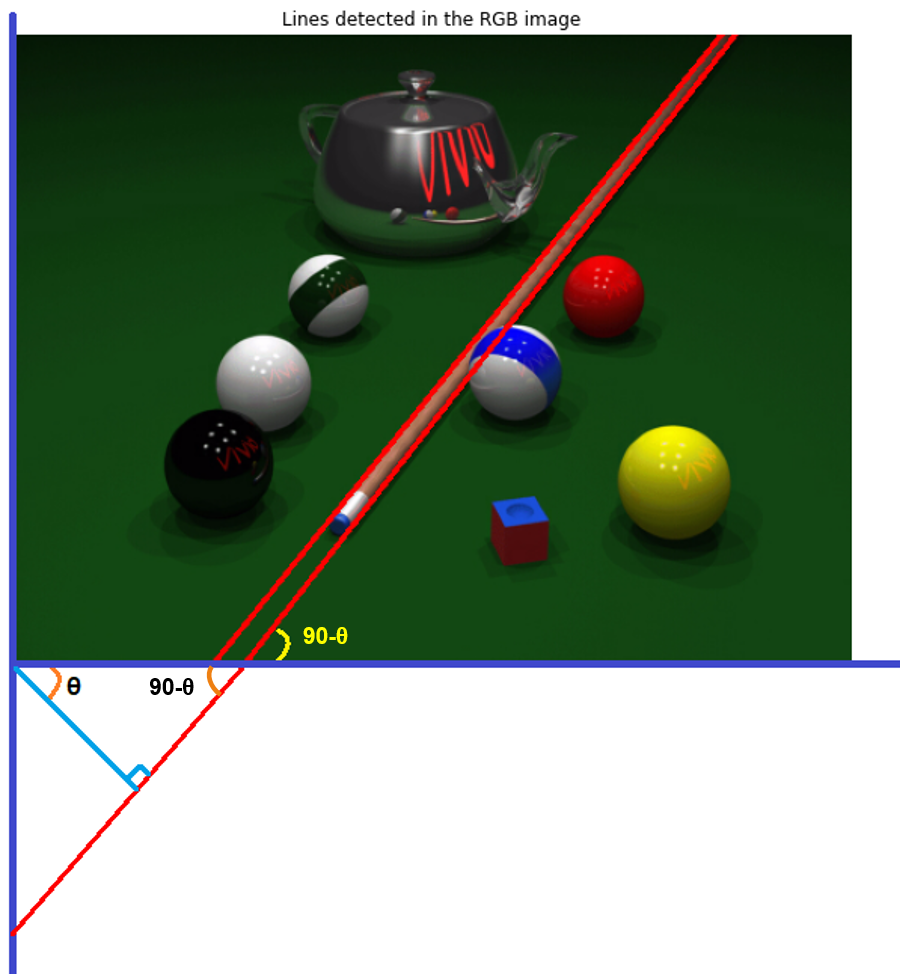

It should be noted that these computations about the "rho" and "theta" variables can also be correspondingly done by the upper left corner of the image but for simplicity reasons the computations were shown according to the left bottom corner of the image.

6. As in this case both lines were detected, we got two values for each variable. Thus we computed the mean value of the two values computed for the "theta" variable (0.6806784 and 0.6632251) which was found equal to 0.6719518 radians.
7. The next step was to convert the unit of radians into degrees. This was done by multiplying the same value by 180 and dividing it by the value of "pi". The result was found to be euqal to 38.50 degrees.
8. Also, as it can also be seen by the image above, the computed value of the angle refers to an angle which is complementary with the desirable one. So, its complementary angle was computed and was found to be equal to 51.50 degrees.
9. Finally, the "ndimage.rotate" function was used to rotate the image. This function rotates an image clockwise but after trying to do so we found out that the "image32.png" image with which our final result should be identical had been roated counter-clockwise. Therefore, we applied the rotation by the same direction by multiplying the degrees used for the rotation with "-1" thus getting the angle value of 51.50 to be used for the rotation. The rotation was applied to both the RGB and to the Grayscale color mode images and regarding the latter one we got an image identical with the desirable which is also save to as an image: "Rotated_Grayscale_Image.png" (to the same folder where this Jupter Notebook is executed).


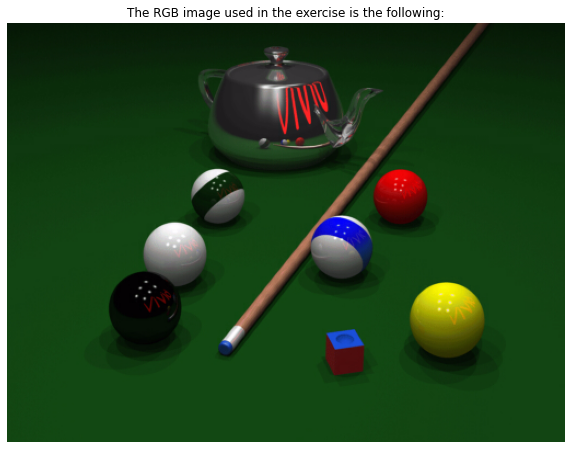

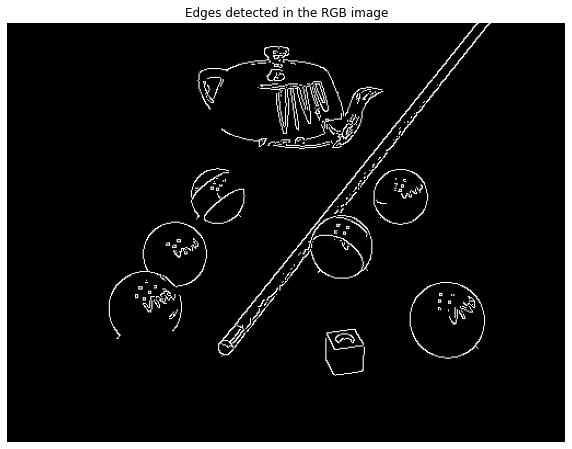

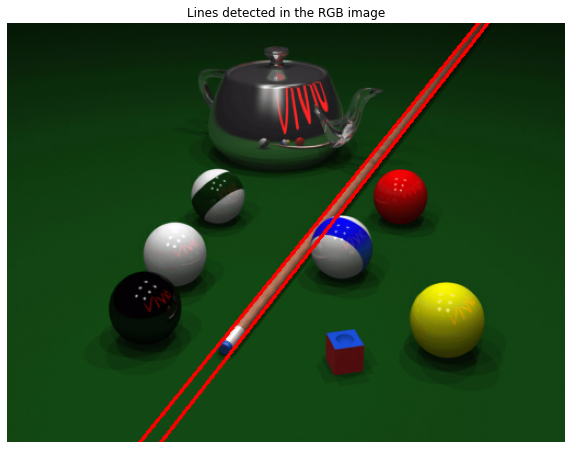

The output of the "cv2.HoughLines" function is returned in radians. So the radians of the "theta" angles of the lines detected in the image are the following:
[0.6806784, 0.6632251]

The mean value of the angles measured in the image is the following:
0.6719518 radians

The radians of the mean value are converted to degrees by multiplying with 180 and dividing with pi. So the mean value of the angles in degrees is the following:
38.50000050217768

This angle computed above is the complementary to the desirable angle. Also the function used for the rotation below ("ndimage.rotate") rotates an image clockwise while in this case the opposite rotation is needed. Therefore the angle rotation is multiplied by -1 and the final result is the following:
-51.49999949782232


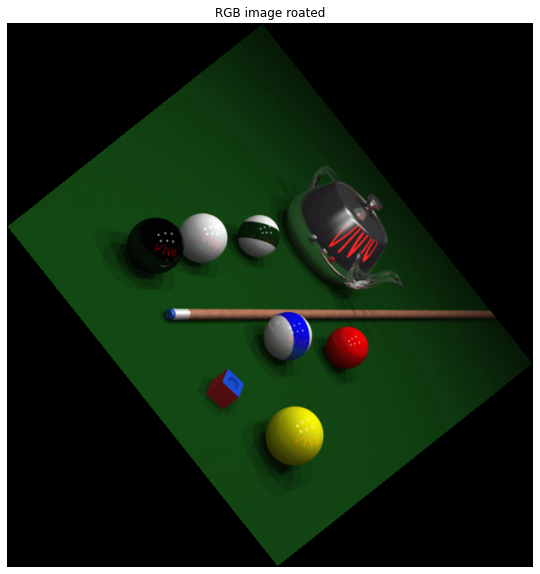

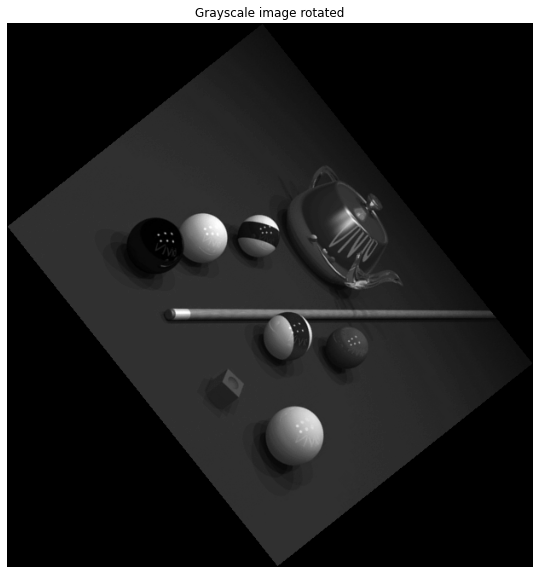

True

In [11]:
# The image is stored to the variable "img" as an BGR image.
img_brg = cv2.imread('image31.png')
# The image is converted to an RBG image.
img_rgb = cv2.cvtColor(img_brg, cv2.COLOR_BGR2RGB)
# The image is displayed.
display_image(img_rgb, "The RGB image used in the exercise is the following:", True)

# The edges of the image are found through the "Canny" method of edge detection.
img_canny = cv2.Canny(img_rgb,100,200)
display_image(img_canny, "Edges detected in the RGB image", True)

# Two lines are expected to be found by the "HoughLines" method. The latter method detects straight lines of the input image.
lines = cv2.HoughLines(img_canny,1,np.pi/180,200)
thetas_list = []
for line in lines:
    for rho,theta in line:
        thetas_list.append(theta)
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img_rgb,(x1,y1),(x2,y2),(255,0,0),2)
display_image(img_rgb, "Lines detected in the RGB image", True)

# The "theta" angle returned by the "cv2.HoughLines" function is measured in radians and not in degrees.
print("The output of the \"cv2.HoughLines\" function is returned in radians. So the radians of the \"theta\" angles of the lines detected in the image are the following:")
print(thetas_list)
print()
print("The mean value of the angles measured in the image is the following:")
thetas_mean = mean(thetas_list)
print(str(thetas_mean) + " radians\n")
# Radians to degrees conversion.
print("The radians of the mean value are converted to degrees by multiplying with 180 and dividing with pi. So the mean value of the angles in degrees is the following:")
degrees = thetas_mean*(180/pi)
print(degrees)
print()
print("This angle computed above is the complementary to the desirable angle. Also the function used for the rotation below (\"ndimage.rotate\") rotates an image clockwise while in this case the opposite rotation is needed. Therefore the angle rotation is multiplied by -1 and the final result is the following:")
degrees_2 = -(90-degrees)
print(degrees_2)

# The image is stored to the variable "img" as an BGR image.
img_brg_2 = cv2.imread('image31.png')
# The image is converted to an RBG image.
img_rgb_2 = cv2.cvtColor(img_brg_2, cv2.COLOR_BGR2RGB)
img_rgb_rotated = ndimage.rotate(img_rgb_2, degrees_2)
display_image(img_rgb_rotated, "RGB image roated", True)

# The image is stored to the variable "img_2" as a gray scale image.
img_gray = cv2.imread('image31.png', 0)
img_gray_rotated = ndimage.rotate(img_gray, degrees_2)
display_image(img_gray_rotated, "Grayscale image rotated", True)

cv2.imwrite("Rotated_Grayscale_Image.png", img_gray_rotated)


## Question 2
We tried two different methods in order to achieve the desirable result for the second problem of the exercise. As both of these methods were found to be successful we decided to present you both of them. Specifically, we can mention that the first method is more efficient in achieving the desirable result when the billiard cue is not horizontal in regards with the horizontal plane of the image while the second one is more efficient in the contrary, so in a way both methods complement each other.

## Question 2.2 - Method 1
1. The image is loaded in Grayscale mode.
2. The function "cv2.HoughCircles" is used in order to detect teh billiard balls of the image. The most crucial billiard ball that we wanted to detect was the one exactly near the billiard cue. We used different values for the parameters of the function until we decided that best combination in order to detect the latter billiard ball and also all the other billiard balls were the ones used in the code below.
3. Each circle/billiard ball detected is colored black.
4. The histogram of the intensities of the pixels of the image is created. Based on that histogram we determined the intensity value which corresponded to the value of the majority of the pixels of the tablecloth of the billiard. We used that intensity as a threshold in order to color each pixel with an intensity below the latter one with 0 intensity (total black). Although we tried converting all bakcground/tablecloth pixels with to black color it was not possible because a part of the cue was starting to be missing after a higher threshold than the chosen one, which was 50, was used. 
5. The same image is loaded in BRG color mode and converted to RGB color mode. The edges of the latter image were detected (as described in the exercise above). 
6. Then an important step follows where we convert the intensity of any pixel with intensity of 0 to the intensity of 1 in the Grayscale image which has the black billiard balls and most of the background black by now (the same image will simply be refered later on as "Grayscale image").
7. After this step we used the "cv2.HoughLines" function, based on the RGB image and based on the edges detected before, in order to find the lines that cross below and above the billiard cue and we set for the same function to draw these lines onto the Grayscale image by setting the pixels of these lines with intensity equal to 0.
8. So now the only pixels in the image with intensity equal to 0 are those of the two lines that cross the billiard cure at is bottom and upper side.
8. Then we parsed each pixel of each row, column to column from left to right, and we set the value of each of those pixels equal to 0 if and only not yet a pixel of 0 intensity has been located or two pixels of 0 intensity have been located. Therefore, the pixels with the range of these two lines are left with unchanged values. This means that any other pixels, outside of the two lines, in which the billiard cue was found, was colored with total black.
9. In addition to the previous transformations of the Grayscale image the final image is rotated and is identical to the desirable one.

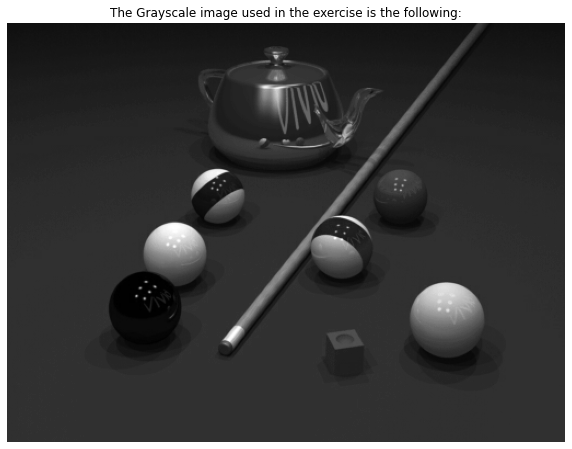

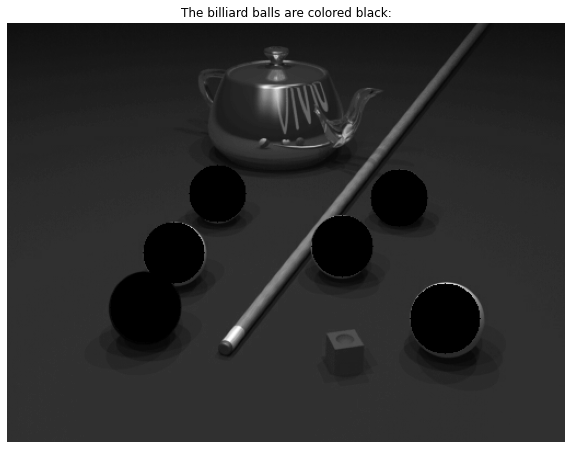

The histogram of the pixels' intensities of the image above is the following:


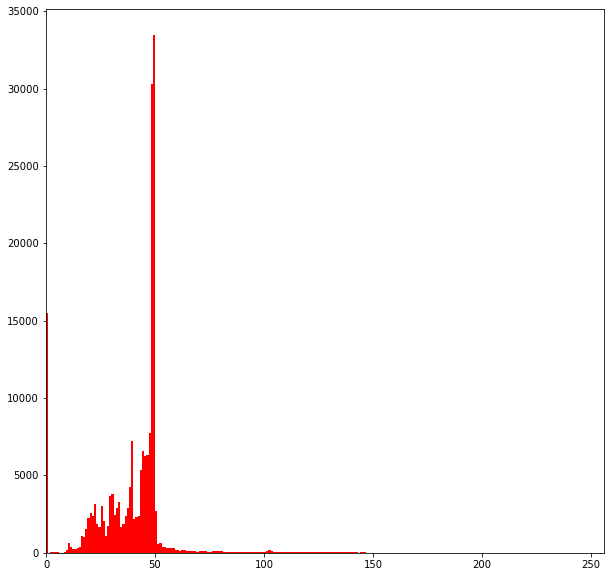

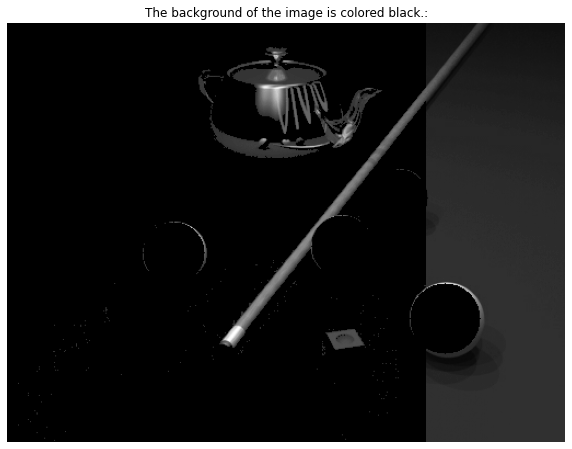

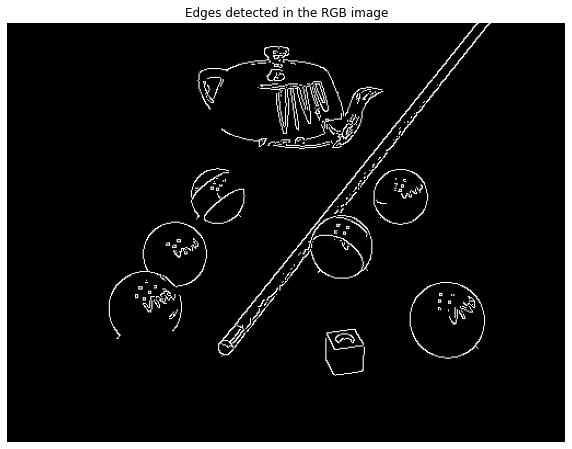

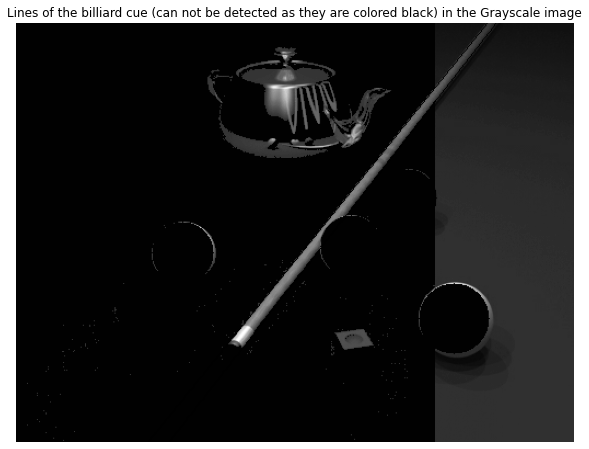

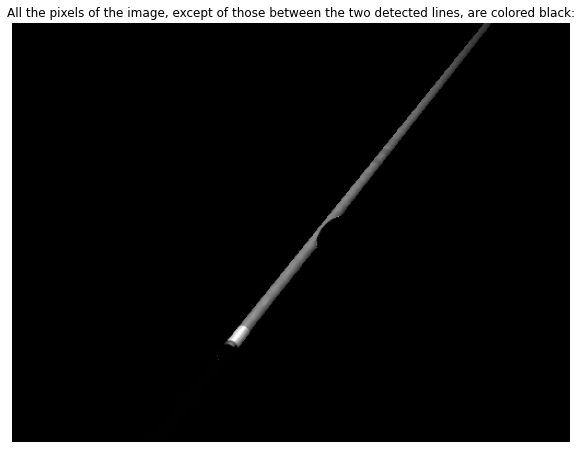

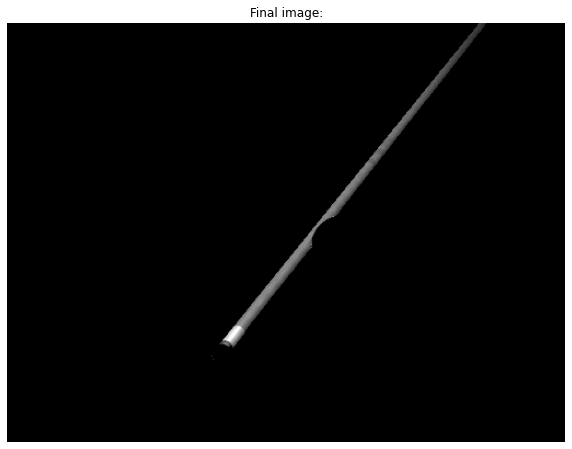

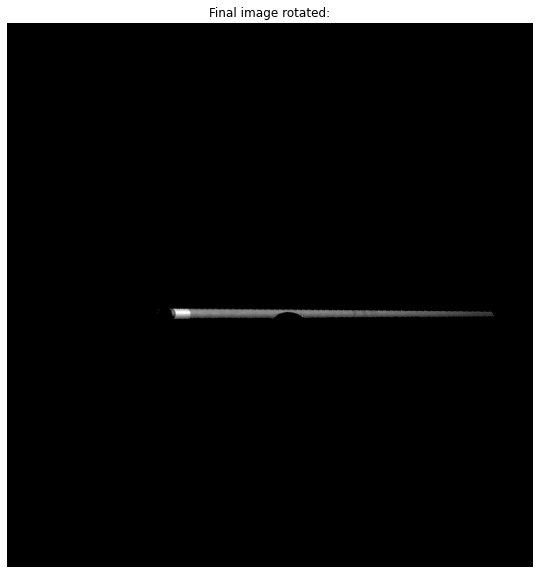

True

In [12]:
img_gray = cv2.imread('image31.png', 0)
display_image(img_gray, "The Grayscale image used in the exercise is the following:", True)

circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 20, param1 = 30, param2 = 30, minRadius = 25, maxRadius = 33)
if circles is not None:
    # Convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    # Loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # Draw the circle in the output image, then draw a rectangle corresponding to the center of the circle
        cv2.circle(img_gray, (x, y), r, (0), -1)
display_image(img_gray, "The billiard balls are colored black:", True)

print("The histogram of the pixels' intensities of the image above is the following:")
plt.figure(figsize=(10, 10))
plt.hist(img_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()
for row in range(0, len(img_gray)):
    for column in range(0, len(img_gray)):
        if img_gray[row][column] <= 50:
            img_gray[row][column] = 0
display_image(img_gray, "The background of the image is colored black.:", True)

# The image is stored to the variable "img" as an BGR image.
img_brg = cv2.imread('image31.png')
# The image is converted to an RBG image.
img_rgb = cv2.cvtColor(img_brg, cv2.COLOR_BGR2RGB)
img_canny = cv2.Canny(img_rgb,100,200)
display_image(img_canny, "Edges detected in the RGB image", True)

# If there is any pixel with a value of 255 in the image, it gets lowered to 254.
for row in range(0, img_gray.shape[0]):
    for column in range(0, img_gray.shape[1]):
        if img_gray[row][column] == 0:
            img_gray[row][column] = 1

# The lines of the cue.
lines = cv2.HoughLines(img_canny,1,np.pi/180,200)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img_gray,(x1,y1),(x2,y2),(0),1)
display_image(img_gray, "Lines of the billiard cue (can not be detected as they are colored black) in the Grayscale image", True)

for row in range(0, img_gray.shape[0]):
    total_black_left_bound = False
    total_black_right_bound = False
    for column in range(0, img_gray.shape[1]):
        if img_gray[row][column] != 0:
            if total_black_left_bound:
                if total_black_right_bound:
                    img_gray[row][column] = 0
                # In-between the two lines nothing happens. The pixels there are left with unchanged intensity.
            else:
                img_gray[row][column] = 0
        else:
            if total_black_left_bound:
                total_black_right_bound = True
            else:
                total_black_left_bound = True
display_image(img_gray, "All the pixels of the image, except of those between the two detected lines, are colored black:", True)

for row in range(0, img_gray.shape[0]):
    for column in range(0, img_gray.shape[1]):
        if img_gray[row][column] == 1:
            img_gray[row][column] = 0
display_image(img_gray, "Final image:", True)

img_gray_rotated = ndimage.rotate(img_gray, degrees_2)
display_image(img_gray_rotated, "Final image rotated:", True)
cv2.imwrite("Rotated_Grayscale_Billiard_Cue_Method_1.png", img_gray_rotated)


## Question 2.2 - Method 2
1. In this method at first the Grayscale image is loaded and right after that rotated. The same procedure as with the above method can not be followed because the "cv2.HoughLines" function can not detect horizontal lines.
2. The same steps as before are followed in order to detect and black out the billiard balls and also the same process is repeated in order to black out the biggest part of the background of the image.
3. The process differs in the fact that now the binary color mode image of the processed Grayscale image is created.
4. The connected components of this binary image are found and labeled.
5. Then we compute, by parsing the pixels one by one and by identifying each connected component by each label, the largest width and length of each connected component.
6. We observed that the billiard cue must have a ration of 1/10 or less than of its length to its width.
7. So we computed each similar ratio by the widths and lengths of each connected component as described above and we chose that one component that had its ration equal or less to 1/10 which was only one, as expected, that of the billiard cue.
8. Finally, we used those pixels of that connected component (billiard cue) in order to leave only those with intensity of 1 and only those we unchanged intensity in the original Grayscale (and rotated) image.
9. The final result was identical with the desirable one.

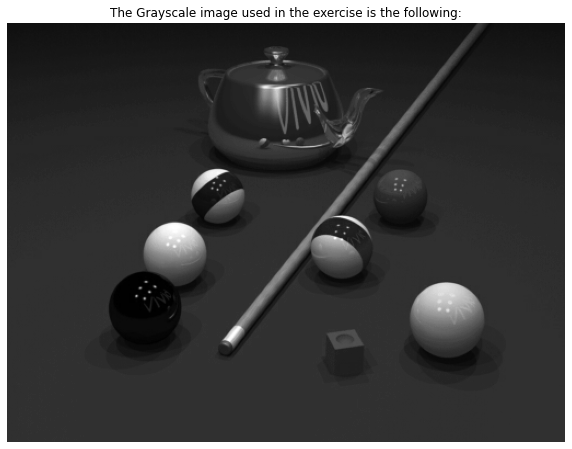

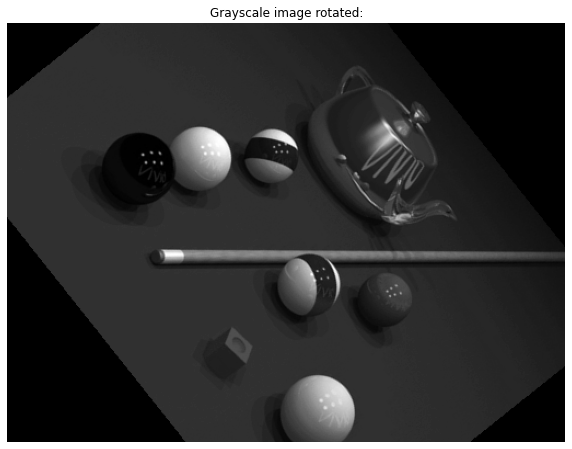

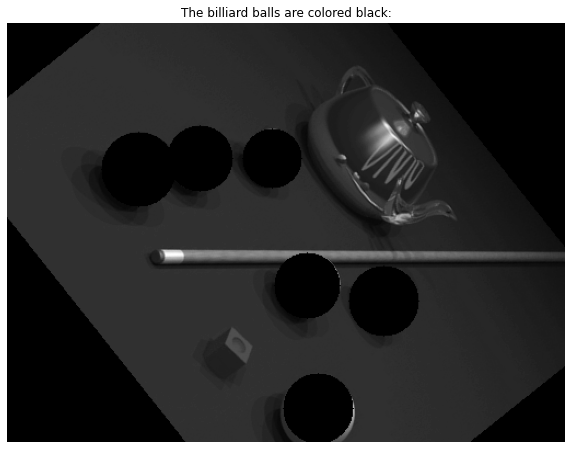

The histogram of the intensities of the image above is the following:


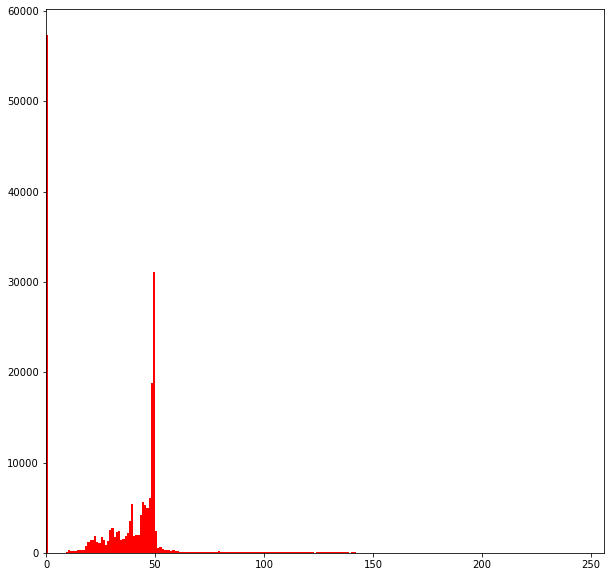

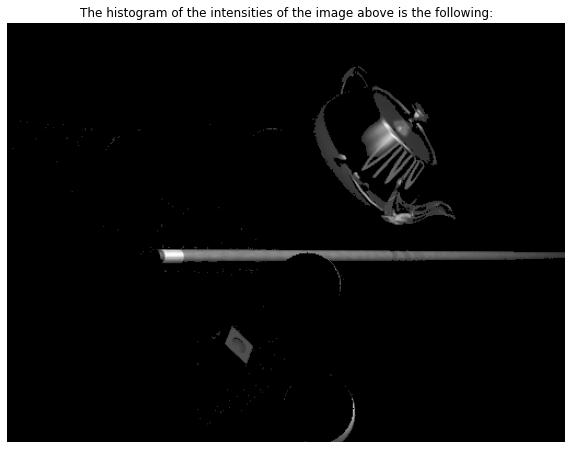

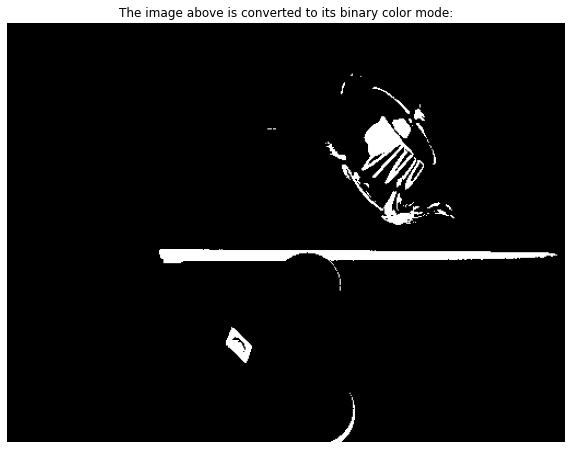

The number of the labels of the different connected components found within the binary image is the following:
45
{1: [2, 2], 2: [1, 1], 3: [11, 4], 4: [25, 34], 5: [3, 1], 6: [11, 10], 7: [62, 48], 8: [4, 3], 9: [14, 10], 10: [1, 1], 11: [1, 4], 12: [1, 3], 13: [3, 2], 14: [17, 18], 15: [1, 1], 16: [3, 2], 17: [14, 4], 18: [28, 18], 19: [27, 17], 20: [55, 74], 21: [4, 5], 22: [16, 5], 23: [4, 5], 24: [6, 12], 26: [3, 2], 27: [6, 6], 25: [1, 1], 28: [6, 13], 29: [1, 1], 31: [1, 2], 30: [2, 2], 32: [1, 1], 33: [3, 4], 34: [1, 1], 35: [1, 1], 36: [15, 364], 37: [4, 3], 38: [5, 2], 39: [6, 1], 40: [4, 1], 41: [33, 24], 42: [1, 1], 43: [1, 1], 44: [41, 22]}

The label of the biliard cue is the following:
36


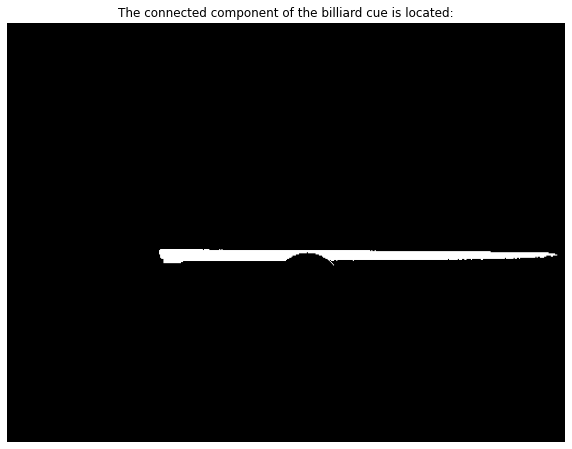

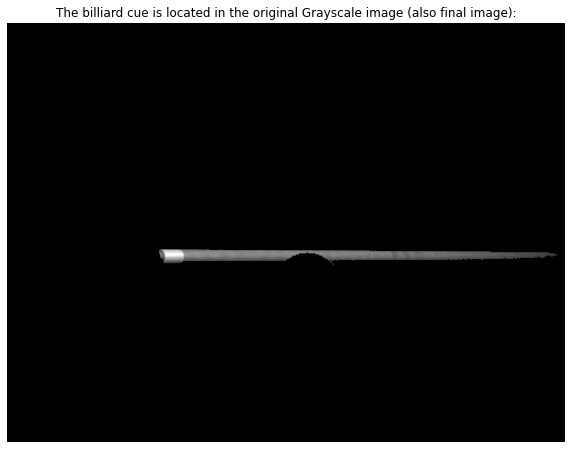

True

In [13]:
img_gray = cv2.imread('image31.png', 0)
display_image(img_gray, "The Grayscale image used in the exercise is the following:", True)

img_gray = ndimage.rotate(img_gray, degrees_2, reshape=False)
display_image(img_gray, "Grayscale image rotated:", True)
img_gray_rot = np.copy(img_gray)

circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 20, param1 = 30, param2 = 30, minRadius = 25, maxRadius = 33)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img_gray, (x, y), r+2, (0), -1)
display_image(img_gray, "The billiard balls are colored black:", True)

print("The histogram of the intensities of the image above is the following:")
plt.figure(figsize=(10, 10))
plt.hist(img_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

for row in range(0, img_gray.shape[0]):
    for column in range(0, img_gray.shape[1]):
        if img_gray[row][column] <= 50:
            img_gray[row][column] = 0
display_image(img_gray, "The histogram of the intensities of the image above is the following:", True)

img_bin = cv2.threshold(img_gray, 60, 255, cv2.THRESH_BINARY)[1]
display_image(img_bin, "The image above is converted to its binary color mode:", True)

num_labels, labels = cv2.connectedComponents(img_bin)
print("The number of the labels of the different connected components found within the binary image is the following:")
print(num_labels)

shapes_dict = {}
for i in range (labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i][j] != 0:
            cur_num = int(labels[i][j])
            if cur_num not in shapes_dict.keys():
                shapes_dict[cur_num] = {0:[i],1:[j]}
            else:
                if i not in shapes_dict[cur_num][0]:
                    shapes_dict[cur_num][0].append(i)
                if j not in shapes_dict[cur_num][1]:
                    shapes_dict[cur_num][1].append(j)
                    
for key in shapes_dict.keys():
    len_1 = len(shapes_dict[key][0])
    len_2 = len(shapes_dict[key][1])
    shapes_dict[key] = [len_1, len_2]
print(shapes_dict)

proportion_threshold = 0.1
for key in shapes_dict:
    proportion_1 = shapes_dict[key][0]/shapes_dict[key][1]
    proportion_2 = shapes_dict[key][1]/shapes_dict[key][0]
    if proportion_1 <= 0.1:
        bil_cue_label = key
    elif proportion_2 <= 0.1:
        bil_cue_label = key

print()
print("The label of the biliard cue is the following:")
print(bil_cue_label)

img_bil_cue = np.zeros([labels.shape[0],labels.shape[1]])
for i in range (labels.shape[0]):
    for j in range(labels.shape[1]):
        if int(labels[i][j]) != bil_cue_label:
            img_bil_cue[i][j] = 0
            img_gray_rot[i][j] = 0
        else:
            img_bil_cue[i][j] = 1
display_image(img_bil_cue, "The connected component of the billiard cue is located:", True)
display_image(img_gray_rot, "The billiard cue is located in the original Grayscale image (also final image):", True)
cv2.imwrite("Rotated_Grayscale_Billiard_Cue_Method_2.png", img_gray_rot)


### Method 1 - Method 2
The billiard cue created by the first method seems to be a slightly better representation of the billiard cue in the original image thus that method is considered as a better approach of the two methods described above. Both methods were desrcibed as both methods were implemented in order to find the best results and we considered it should be best to mention and describe both of them.